In [1]:
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import imutils

In [2]:
# shape

In [3]:
# color

In [4]:
# adaptive threshholding

In [5]:
# Auto rotate  

In [6]:
# histogram

In [ ]:
# 

In [7]:
# correct spelling 
#from autocorrect import spell
#print spell('caaaar')

In [40]:
from PIL import Image

basewidth = 300
img = Image.open('temp/1.png')
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img.save('temp/1_modified.png')

['“CHM']

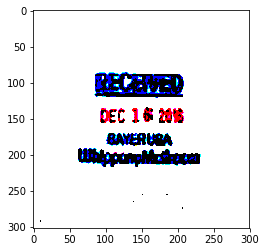

In [41]:
im=Image.open('temp/1_modified.png')
threshold =  190 #167  #170
im = im.point(lambda p: p > threshold and 255)
#im = im.rotate(-6)
plt.imshow(im)
text = pytesseract.image_to_string(im)
text.split('\n')

#############################################################################################

['as: Hm', 'mm']

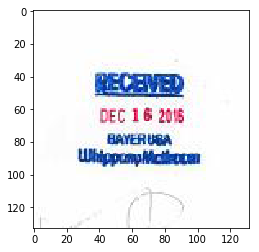

In [44]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter

im = Image.open('temp/1.png') # the second one 
#im = im.filter(ImageFilter.MedianFilter())
#enhancer = ImageEnhance.Contrast(im)
#im = enhancer.enhance(2)
#im = im.convert('1')
plt.imshow(im)
im.save('temp.jpg')
text = pytesseract.image_to_string(Image.open('temp.jpg'))
text.split('\n')

#############################################################################################

['DE: 1 r M', 'will', '', 'W']

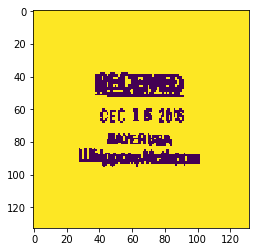

In [45]:
import cv2

# load the example image and convert it to grayscale
image = cv2.imread('temp/1.png',1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


gray = cv2.threshold(gray, 200, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

#gray = cv2.medianBlur(gray, 3)
plt.imshow(gray)
text = pytesseract.image_to_string(gray)
text.split('\n')

#############################################################################################

In [12]:
class ShapeDetector:
	def __init__(self):
		pass

	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)

		# if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"

		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)

			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"

		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"

		# return the name of the shape
		return shape

In [13]:
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
sd = ShapeDetector()

In [14]:
ratio=1 # let it be 

In [15]:
# loop over the contours
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)

	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)

	# show the output image
	cv2.imshow("Image", image)
	cv2.waitKey(0)